In [203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from scipy.stats import chi2_contingency

%matplotlib inline

df = pd.read_excel("SharkAttack_clean.xlsx")

# Which month is the deadliest?

In [204]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Extract month
df['Month'] = df['Date'].dt.month

# Count fatal attacks per month
deadliest_month = df[df['Fatal Y/N'] == 'Y']['Month'].value_counts()

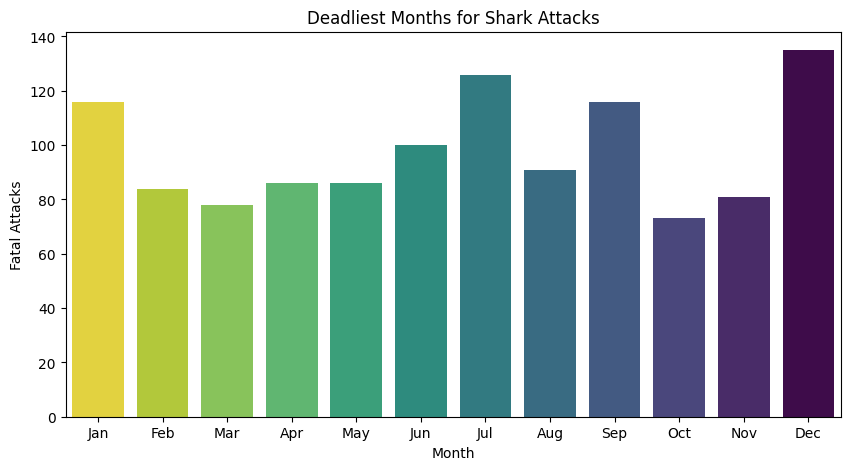

In [217]:
# Plot the deadliest months
plt.figure(figsize=(10,5))
sns.barplot(x=deadliest_month.index, y=deadliest_month.values, hue=deadliest_month.index, palette="viridis_r", legend=False)
plt.xlabel("Month")
plt.ylabel("Fatal Attacks")
plt.title("Deadliest Months for Shark Attacks")
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Which hour of the day is the deadliest?

In [206]:
# Count fatal attacks per time category
deadliest_time = df[df['Fatal Y/N'] == 'Y']['Time'].value_counts()

# Sort time categories in logical order
time_order = ["Morning", "Afternoon", "Evening", "Night"]
deadliest_time = deadliest_time.reindex(time_order)

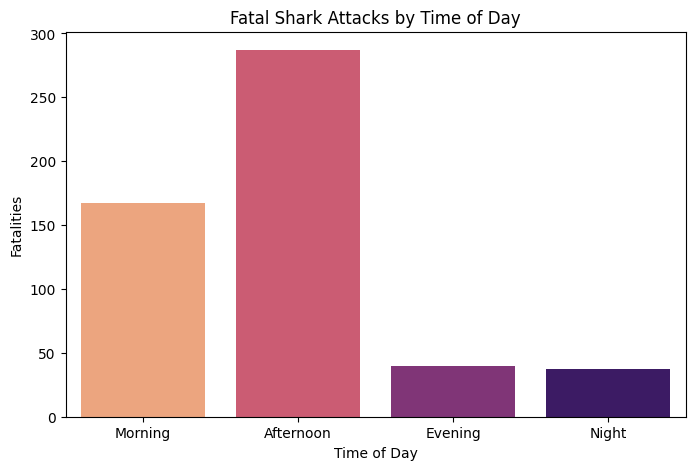

In [214]:
# Plot the deadliest time of day
plt.figure(figsize=(8,5))
sns.barplot(x=deadliest_time.index, y=deadliest_time.values, hue=deadliest_time.index, palette="magma_r", legend=False)
plt.xlabel("Time of Day")
plt.ylabel("Fatalities")
plt.title("Fatal Shark Attacks by Time of Day")
plt.show()

# Most Dangerous time of day by month?

### Grouped Bar Plot

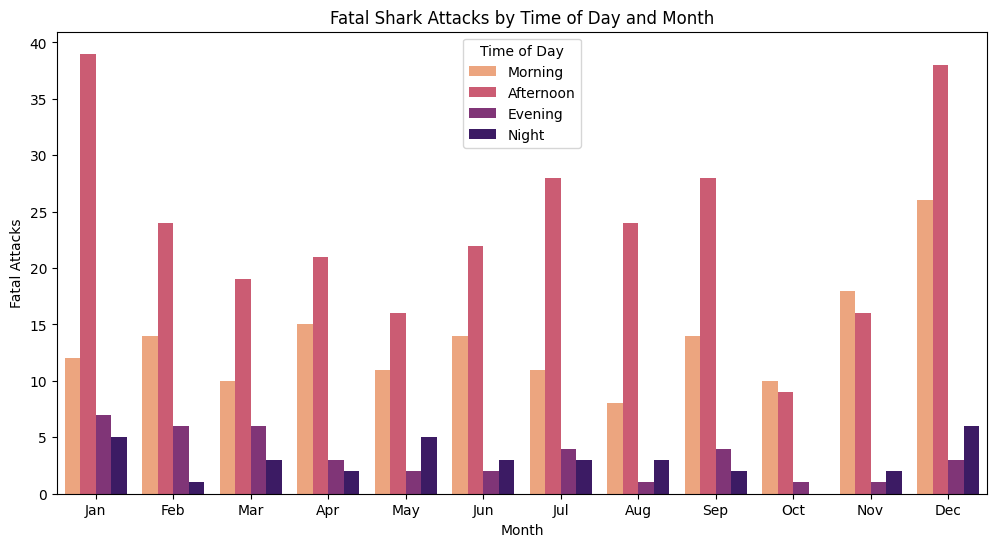

In [208]:
# Define valid times
valid_times = ["Morning", "Afternoon", "Evening", "Night"]

# Filter dataset
df_filtered = df[(df["Time"].isin(valid_times)) & (df["Fatal Y/N"] == "Y")]

# Count fatalities grouped by Month & Time
fatal_counts = df_filtered.groupby(["Month", "Time"]).size().reset_index(name="Fatalities")

# Ensure all months (1-12) exist, even if they have 0 fatalities
all_months = pd.DataFrame([(m, t) for m in range(1, 13) for t in valid_times], columns=["Month", "Time"])
fatal_counts = all_months.merge(fatal_counts, on=["Month", "Time"], how="left").fillna(0)

plt.figure(figsize=(12,6))

# Grouped bar plot with correctly spaced months
sns.barplot(data=fatal_counts, x="Month", y="Fatalities", hue="Time", palette="magma_r")

plt.xlabel("Month")
plt.ylabel("Fatal Attacks")
plt.title("Fatal Shark Attacks by Time of Day and Month")

# Ensure months are labeled correctly
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Time of Day")
plt.show()

### Stacked Bar Plot

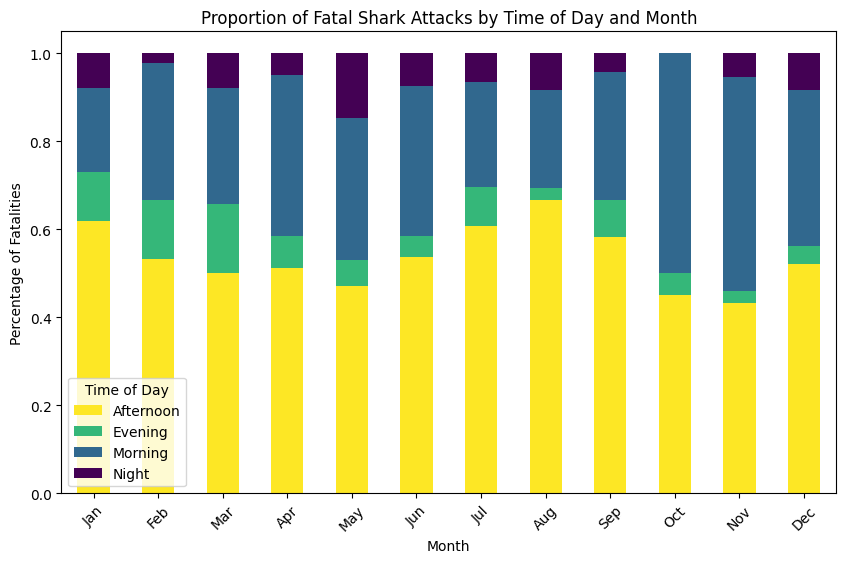

In [209]:
# Pivot table for stacked bar plot
stacked_data = fatal_counts.pivot(index="Month", columns="Time", values="Fatalities")

# Normalize to show proportions per month
stacked_data = stacked_data.div(stacked_data.sum(axis=1), axis=0)

# Plot
stacked_data.plot(kind="bar", stacked=True, colormap="viridis_r", figsize=(10,6))
plt.xlabel("Month")
plt.ylabel("Percentage of Fatalities")
plt.title("Proportion of Fatal Shark Attacks by Time of Day and Month")
plt.legend(title="Time of Day")
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

### Point Plot

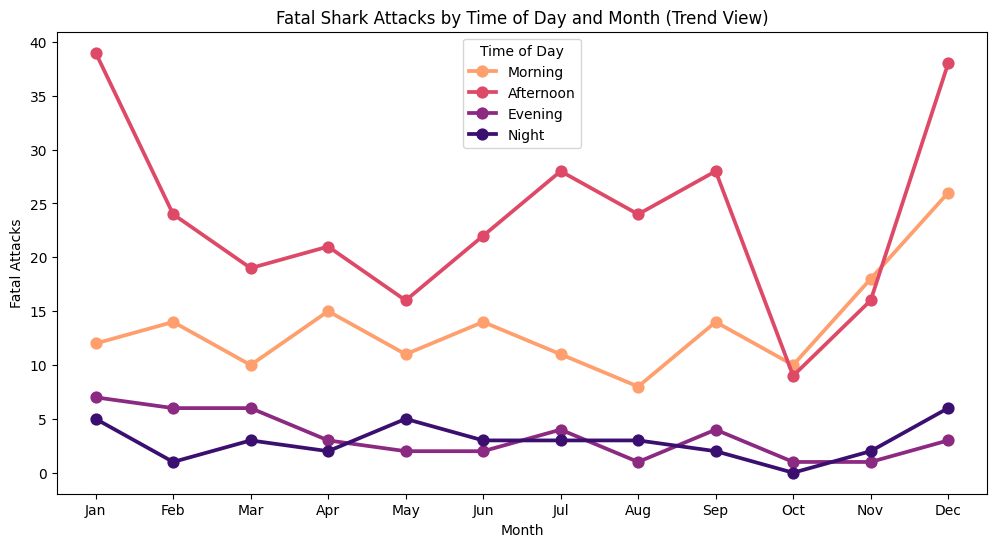

In [210]:
plt.figure(figsize=(12,6))

# Point plot for trend comparison
sns.pointplot(data=fatal_counts, x="Month", y="Fatalities", hue="Time", palette="magma_r")

plt.xlabel("Month")
plt.ylabel("Fatal Attacks")
plt.title("Fatal Shark Attacks by Time of Day and Month (Trend View)")

# Ensure months are labeled correctly
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title="Time of Day")
plt.show()

# Statistical Tests

### Chi-Square

In [211]:
# Create a contingency table for Time of Day vs Fatality
contingency_time = pd.crosstab(df['Time'], df['Fatal Y/N'])

# Create a contingency table for Month vs Fatality
contingency_month = pd.crosstab(df['Month'], df['Fatal Y/N'])

# Perform Chi-Square test for Time of Day
chi2_time, p_time, dof_time, expected_time = chi2_contingency(contingency_time)
print(f"Chi-Square Test for Time of Day: χ²={chi2_time:.2f}, p={p_time:.2e}, dof={dof_time}")

# Perform Chi-Square test for Month
chi2_month, p_month, dof_month, expected_month = chi2_contingency(contingency_month)
print(f"Chi-Square Test for Month: χ²={chi2_month:.2f}, p={p_month:.2e}, dof={dof_month}")

Chi-Square Test for Time of Day: χ²=444.61, p=4.06e-37, dof=126
Chi-Square Test for Month: χ²=62.22, p=1.04e-05, dof=22


### Cramér's V

In [212]:
def cramers_v(contingency_table):
    """Calculate Cramér's V statistic for categorical association."""
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total observations
    k = min(contingency_table.shape) - 1  # Min(dimensions - 1)
    return np.sqrt(chi2 / (n * k))

# Calculate Cramér’s V for Time of Day vs Fatality
cramers_v_time = cramers_v(contingency_time)
print(f"Cramér's V for Time of Day: {cramers_v_time:.4f}")

# Calculate Cramér’s V for Month vs Fatality
cramers_v_month = cramers_v(contingency_month)
print(f"Cramér's V for Month: {cramers_v_month:.4f}")

Cramér's V for Time of Day: 0.1869
Cramér's V for Month: 0.0717
